In [213]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from functools import reduce
import sympy as sm
import scipy as sc
from scipy.interpolate import splrep, splev
from scipy.optimize import curve_fit
from math import floor
from itertools import product
from random import shuffle

θ = sm.symbols('theta', positive=True, real=True)
α = sm.symbols('alpha', integer=True, positive=True)
Y = sm.symbols('Y', positive=True, real=True)
sm.init_printing()

In [214]:
def approx_cos(theta):
    num = np.pi**2 - 4*theta**2
    denom = np.pi**2 + theta**2
    return num / denom

def approx_acos(x):
    return np.sqrt((np.pi*np.pi*(1-x))/(x-4))

In [215]:
# https://math.stackexchange.com/questions/3291489/can-the-fibonacci-lattice-be-extended-to-dimensions-higher-than-3

In [216]:
rho_func = (1/sm.sqrt(sm.pi))*(sm.gamma((α + 1) / 2) / sm.gamma(α / 2))*sm.Pow(sm.sin(θ), α-1)
#rho_func = (1/sm.sqrt(sm.pi))*(sm.gamma((α + 1) / 2) / sm.gamma(α / 2))*sm.Pow(sin_subs, α-1)
Y_func = sm.integrate(rho_func, (θ, 0, θ))

In [223]:
Y_sols = []
for i in range(1, 8):
    sol = sm.trigsimp(sm.simplify(Y_func.subs({α: i})), method='fu')
    sol = sm.simplify(sol)
    Y_sols.append(sol)
    
Y_sols[0] = Y_sols[0]/2 # manually remap output to [0, 2*pi]

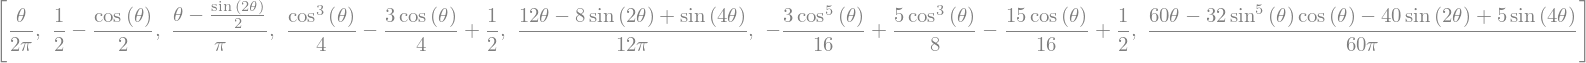

In [224]:
Y_sols

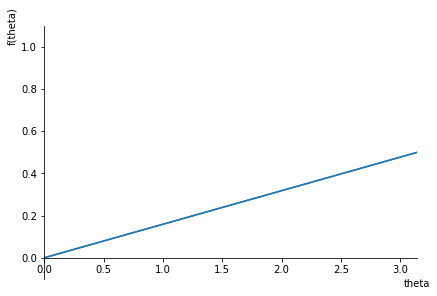

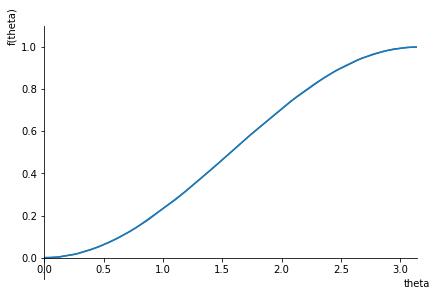

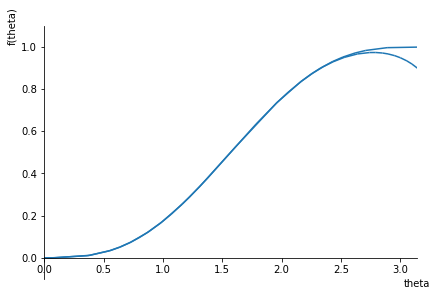

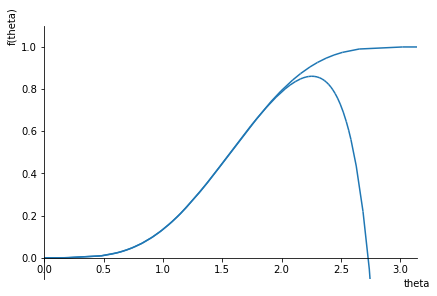

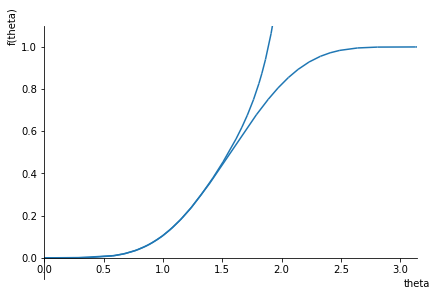

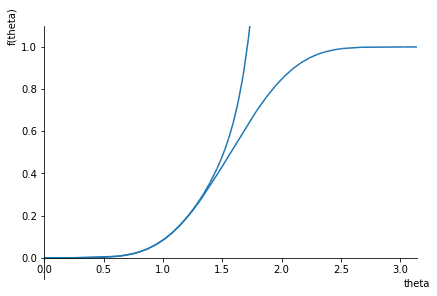

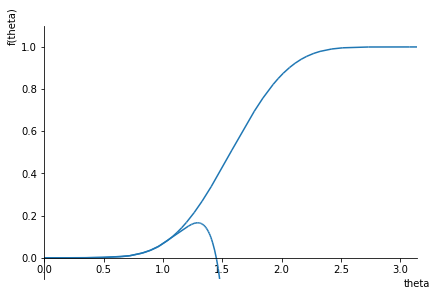

In [238]:
for sol in Y_sols:
    p = sm.plot(sol.series(n=15, x0=0).removeO(), xlim=(0, np.pi), ylim=(-.1, 1.1), show=False)
    p.append(sm.plot(sol, xlim=(0, np.pi),  ylim=(-.1, 1.1), show=False)[0])
    p.show()

In [425]:
sm.solve(sm.Eq(Y_sols[1], Y), θ)

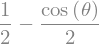

In [445]:
Y_sols[1]

In [516]:
def custom_cubic(x, d, h):
    a = 0
    b = np.pi + d/2
    c = (-3/2)*d
    x = x + h
    return a + b*x + c*x*x + d*x*x*x

def basic_hyperbola(x, s_1, s_2, o_x, o_y, c):
    # x -> Input x values
    # s_1 -> slope of line 1
    # s_2 -> slope of line 2
    # o_x -> x offset of crossing of asymptotes
    # o_y -> y offset of crossing of asymptotes
    # c   -> curvature of hyperbola

    b_2 = (s_1 + s_2) / 2
    b_1 = (s_2 - s_1) / 2

    return o_y + b_1 * (x - o_x) - b_2 * np.sqrt((x - o_x) ** 2 + c ** 2 / 4)

def inverse_hyperbola(Y, s_1, s_2, o_x, o_y, c, sgn=1):
    b_2 = (s_1 + s_2) / 2
    b_1 = (s_2 - s_1) / 2
    b_1_2 = b_1*b_1
    b_2_2 = b_2*b_2
    
    det = 4*Y**2 - 8*Y*o_y + b_1_2*c**2 - b_2_2*c**2 + 4*o_y**2
    det2 = 4*(1-Y)**2 - 8*(1-Y)*o_y + b_1_2*c**2 - b_2_2*c**2 + 4*o_y**2
    return np.where(Y<=.5, (Y*b_1 + b_1_2*o_x - b_1*o_y - b_2_2*o_x + sgn*b_2*np.sqrt(det)/2)/(b_1_2 - b_2_2), (3*np.pi/2)-1*(((1-Y)*b_1 + b_1_2*o_x - b_1*o_y - b_2_2*o_x + sgn*b_2*np.sqrt(det2)/2)/(b_1_2 - b_2_2)) - np.pi/2)

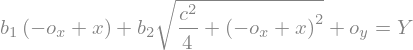

[(Y*b_1 + b_1**2*o_x - b_1*o_y - b_2**2*o_x - b_2*sqrt(4*Y**2 - 8*Y*o_y + b_1**2*c**2 - b_2**2*c**2 + 4*o_y**2)/2)/(b_1**2 - b_2**2), (Y*b_1 + b_1**2*o_x - b_1*o_y - b_2**2*o_x + b_2*sqrt(4*Y**2 - 8*Y*o_y + b_1**2*c**2 - b_2**2*c**2 + 4*o_y**2)/2)/(b_1**2 - b_2**2)]


In [517]:
o_y, o_x, b_1, b_2, x, c = sm.symbols('o_y o_x b_1 b_2 x c')
eqn = sm.Eq(o_y + b_1 * (x - o_x) + b_2 * sm.sqrt(sm.Pow((x - o_x), 2) + sm.Pow(c, 2) / 4), Y)
display(eqn)
print(sm.solve(eqn, x))

/home/kxnr/.conda/pkgs/kxnr/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


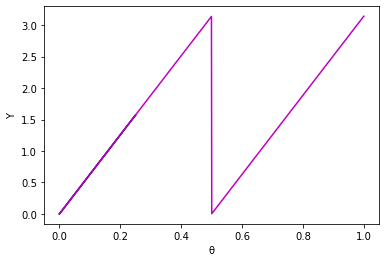

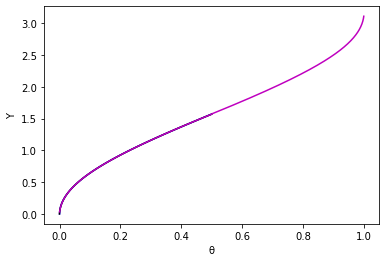

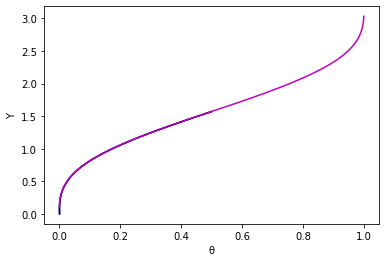

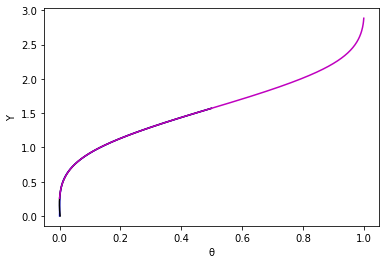

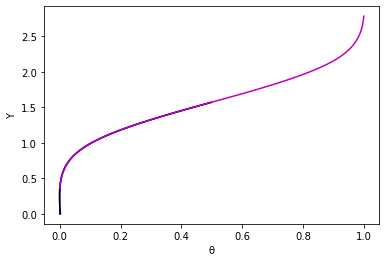

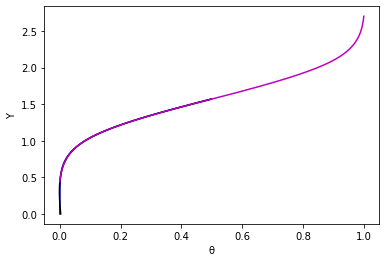

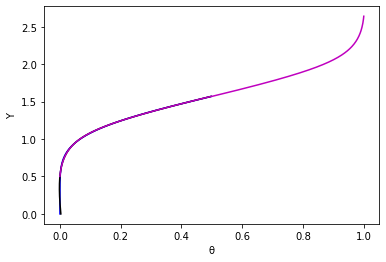

In [518]:
# plot
theta_grid = np.linspace(0, np.pi, 1000)
y_grid = np.linspace(0, 1, 1000)
offsets = np.linspace(-.1, .1, 1000)
# pretty bad, but good enough for now--let's get some noise
fits = []

for sol in Y_sols:

    Y_grid = sm.lambdify(θ, sol, 'numpy')(theta_grid)

    #     fit = np.polynomial.polynomial.Polynomial.fit(Y_grid, theta_grid, deg=3)
    #     fits.append(fit)
    #     xx, yy = fit.linspace()

    
    #     plt.plot(theta_grid, Y_grid, color='b')
    #     plt.plot(yy, xx, color='g')
    plt.plot(Y_grid[:len(Y_grid)//2], theta_grid[:len(Y_grid)//2], color='b')

    popt, pcov = curve_fit(basic_hyperbola, Y_grid[:len(Y_grid)//2], theta_grid[:len(theta_grid)//2], p0=(-1.8, 1.8, -.1, .6, .05), maxfev=100000)
    t_result = basic_hyperbola(y_grid[:len(y_grid)//2], *popt)
    #plt.plot(y_grid[:len(y_grid)//2], t_result, color='r')
    
    popt, pcov = curve_fit(basic_hyperbola, theta_grid[:len(theta_grid)//2], Y_grid[:len(Y_grid)//2], p0=(.1, .5, .5, .9, -.1), maxfev=100000)
    t_result = basic_hyperbola(theta_grid[:len(theta_grid)//2], *popt)
    plt.plot(t_result, theta_grid[:len(theta_grid)//2], color='k')
    
    #popt, pcov = curve_fit(inverse_hyperbola, Y_grid[:len(Y_grid)//2], theta_grid[:len(theta_grid)//2], p0=(.1, .5, .5, .9, -.1), maxfev=100000)
    t_result = inverse_hyperbola(y_grid, *popt, sgn=1)
    plt.plot(y_grid, t_result, color='m')


    
#     popt, pcov = curve_fit(rot_hyperbola, Y_grid[:len(Y_grid)//2], theta_grid[:len(theta_grid)//2], maxfev=100000)
#     print(popt)
#     t_result = rot_hyperbola(y_grid[:len(y_grid)//2], *popt)
#     plt.plot(t_result, y_grid[:len(y_grid)//2], color='m')

    #     popt, pcov = curve_fit(weird_interp, Y_grid, theta_grid, p0=[12, .8])
    #     t_result = weird_interp(y_grid, *popt)
    #     plt.plot(t_result, y_grid, color='m')

    plt.ylabel('Y')
    plt.xlabel('θ')
    plt.show()


In [68]:
def fibonacci_grid(num_pts, e=3.5):
    phi = (1 + np.sqrt(5)) / 2
    pts = [(0, 0),]
    for i in range(1, num_pts-1):
        pts.append(((i + e) / (num_pts - 1 + 2*e), i / phi))
    
    pts.append((1, 0))
    return np.array(pts)

def fibonacci_cube(num_planes, e=3.5):
    phi = (1 + np.sqrt(5)) / 2
    plane = fibonacci_grid(num_planes, e=3.5)
    cube = []
    for i in range(num_planes):
        cube.append(np.concatenate((plane, np.full((plane.shape[0], 1), (i / phi) % 1)), 1))
        
    return np.concatenate(cube)    

def spiral_xform(pts):
    xformed = []
    for i, pt in enumerate(pts):
        r, theta = np.sqrt(pt[0]), 2*np.pi*(pt[1])
        xformed.append((r*np.cos(theta), r*np.sin(theta)))
    return np.array(xformed)

def spherical_xform(pts):
    xformed = []
    for i, pt in enumerate(pts):
        theta, phi = np.pi*2*pt[1], np.arccos(1-2*pt[0])
        xformed.append((np.sin(theta)*np.sin(phi), np.cos(theta)*np.sin(phi), np.cos(phi)))
    return np.array(xformed)
        
def hyperspherical_xform(pts):
    xformed = []
    for i, pt in enumerate(pts):
        # 1-2*x: mapping values 0-1 -> -1-1
        theta, phi, chi = np.pi*2*pt[0], np.arccos(1-2*pt[1]), np.arccos(1-2*pt[2])
        xformed.append((np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi)*np.cos(chi), np.cos(theta), np.sin(theta)*np.sin(phi)*np.sin(chi)))
    return np.array(xformed)


def nspherical_to_cartesian(r, *angles):
    from math import sin, cos
    from functools import reduce
    ndim = len(angles) + 1
    pt = np.zeros(ndim)
    for i in range(ndim):
        pt[i] = reduce(lambda a, b: a*b, (sin(angles[k]) for k in range(i)), 1) * (cos(angles[i]) if i < ndim-1 else 1)
    
    return pt

In [279]:
def quintic(t: float):
    return t * t * t * (t * (t * 6 - 15) + 10)

def lerp(t, a, b):
    return a + t * (b - a)

ptable = [151,160,137,91,90,15,
          131,13,201,95,96,53,194,233,7,225,140,36,103,30,69,142,8,99,37,240,21,10,23,
          190, 6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33,
          88,237,149,56,87,174,20,125,136,171,168, 68,175,74,165,71,134,139,48,27,166,
          77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244,
          102,143,54, 65,25,63,161, 1,216,80,73,209,76,132,187,208, 89,18,169,200,196,
          135,130,116,188,159,86,164,100,109,198,173,186, 3,64,52,217,226,250,124,123,
          5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42,
          223,183,170,213,119,248,152, 2,44,154,163, 70,221,153,101,155,167, 43,172,9,
          129,22,39,253, 19,98,108,110,79,113,224,232,178,185, 112,104,218,246,97,228,
          251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107,
          49,192,214, 31,181,199,106,157,184, 84,204,176,115,121,50,45,127, 4,150,254,
          138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180] * 2

def hash_corner(*coords, ptable = ptable):
    return ptable[reduce(lambda a, b: ptable[a] + b, coords)]

def grad(n, N, *coords):
    # valid for 2D+, limited to the quality of approximations for the gamma integrals above
    dims = len(coords)
    Y = [(n*irrational_sequence(i)) % 1 for i in range(dims)]
    Y[0] = n / (N+1) if dims > 2 else Y[0]
    angles = [inv(y) for y, inv in zip(Y, reversed(fits[:dims-1]))]
    return reduce(lambda a, b: a + b, map(lambda a: a[0]*a[1], zip(coords, nspherical_to_cartesian(1, *angles))))

def rhombic_grad(n, N, x, y, z):
    pass

def original_grad(n, N, x, y, z):
    h = n & 15
    u =  coords[0] if h < 8 else coords[1]
    v =  coords[1] if h < 4 else (coords[0] if h==12 or h==14 else coords[2])
    return (u if (h&1) == 0 else -u) + (v if (h&2) == 0 else -v);
    
def irrational_sequence(ind, seq='chen'):
    if seq == 'chen':
        chen = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 47, 53, 59, 67, 71, 83, 89, 101]
        return np.sqrt(chen[ind])

In [93]:
def noise(*coords, basis=256, grad=grad, ptable=ptable, debug=False):
    dims = len(coords)
    unit = [floor(c) & (basis-1) for c in coords]
    interp = [quintic(c % 1) for c in coords]
    corners = list(product(*((u, u+1) for u in unit)))
    
    def _noise(level, corners):
        if len(corners) > 2:
            return lerp(interp[level], _noise(level+1, corners[:len(corners)//2]), _noise(level+1, corners[len(corners)//2:]))
        else:
            h1 = hash_corner(*corners[0], ptable=ptable)
            h2 = hash_corner(*corners[1], ptable=ptable)
            return lerp(interp[level], grad(h1, basis, *(a-b for a, b in zip(coords, corners[0]))), grad(h2, basis, *(a-b for a, b in zip(coords, corners[1]))))
    
    return _noise(0, corners)    

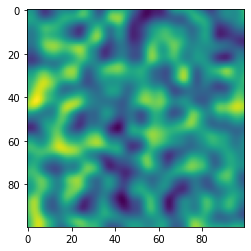

In [103]:
x, y = np.linspace(0, 10, 100), np.linspace(0, 10, 100)
img = np.zeros((len(x), len(y)))
basis = 16777216
table = list(range(basis))*2
shuffle(table)

for i, vi in enumerate(x):
    for j, vj in enumerate(y):
        img[i, j] = noise(vi, vj, 2.3, 9.7, 1.2, basis=basis, ptable=table)
        
plt.imshow(img)
plt.show()

In [231]:
%%timeit

for i, vi in enumerate(x):
    for j, vj in enumerate(x):
        for k, vk in enumerate(x):
            noise(vi, vj, vk)

3min 24s ± 606 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [232]:
%%timeit

for i, vi in enumerate(x):
    for j, vj in enumerate(x):
        for k, vk in enumerate(x):
            noise(vi, vj, vk, grad=original_grad)

25.6 s ± 70.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
